In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import  classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV




In [3]:
df = pd.read_csv("final.csv")


# Classification User

In [4]:
feature_cols_users = ['followers_count', 'favourites_count','friends_count',
       'statuses_count', 'listed_count', 'cred','BotScore',
       'normalize_influence']

In [121]:
# Priprema podataka
x = df[feature_cols_users]
y = df['BinaryNumTarget']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [9]:
#Random Forest - User

rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")
print("F1 score по класама:")
print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6562837661611833
Precision: 0.687297472456254
Recall: 0.6126074084771463
Macro F1: 0.656
Weighted F1 ): 0.656
------------------------------
F1 score по класама:
Klasa 0: 0.664
Klasa 1: 0.648
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66     12990
         1.0       0.69      0.61      0.65     13849

    accuracy                           0.66     26839
   macro avg       0.66      0.66      0.66     26839
weighted avg       0.66      0.66      0.66     26839

------------------------------
Confusion matrix:
[[9130 3860]
 [5365 8484]]


In [10]:

#Decision Tree - User

clf = DecisionTreeClassifier()


param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 :", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")
print("F1 score по класама:")
print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.6311710570438541
Precision: 0.6424963924963925
Recall: 0.6430067152863023
Macro F1: 0.631
Weighted F1 : 0.631
------------------------------
F1 score по класама:
Klasa 0: 0.619
Klasa 1: 0.643
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62     12990
         1.0       0.64      0.64      0.64     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8035 4955]
 [4944 8905]]


In [122]:
# Naive Bayes - User

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")
print("F1 score по класама:")
print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5575095942471776
Precision: 0.5817789936168449
Recall: 0.5067513899920572
Macro F1: 0.557
Weighted F1 ): 0.556
------------------------------
F1 score по класама:
Klasa 0: 0.572
Klasa 1: 0.542
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.61      0.57     12990
         1.0       0.58      0.51      0.54     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.56      0.56     26839

------------------------------
Confusion matrix:
[[7945 5045]
 [6831 7018]]


In [12]:
# Logistic Regression - User

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='f1')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best hyperparameters from GridSearchCV: {'C': 0.1}
Najbolji parametri: {'C': 0.1}
Accuracy: 0.5669734341816014
Precision: 0.60311139920363
Recall: 0.4702866632969889
Macro F1: 0.564
Weighted F1 ): 0.563
------------------------------
Klasa 0: 0.6
Klasa 1: 0.528
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.67      0.60     12990
         1.0       0.60      0.47      0.53     13849

    accuracy                           0.57     26839
   macro avg       0.57      0.57      0.56     26839
weighted avg       0.57      0.57      0.56     26839

------------------------------
Confusion matrix:
[[8704 4286]
 [7336 6513]]


In [14]:
# KNN User

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

macro_f1 = metrics.f1_score(y_test, y_pred_knn, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred_knn, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred_knn, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))

Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.6462237788293156
Precision: 0.657662224797219
Recall: 0.6557152140948805
Macro F1: 0.646
Weighted F1 ): 0.646
------------------------------
Klasa 0: 0.635
Klasa 1: 0.657
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64     12990
         1.0       0.66      0.66      0.66     13849

    accuracy                           0.65     26839
   macro avg       0.65      0.65      0.65     26839
weighted avg       0.65      0.65      0.65     26839

------------------------------
Confusion matrix:
[[8263 4727]
 [4768 9081]]


In [15]:
#XGBoost - User

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))

macro_f1 = metrics.f1_score(y_test, y_pred_xgb, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred_xgb, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred_xgb, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6278177279332315
Precision: 0.6504990642545228
Recall: 0.6023539605747708
Macro F1: 0.628
Weighted F1 ): 0.628
------------------------------
Klasa 0: 0.63
Klasa 1: 0.626
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.65      0.63     12990
         1.0       0.65      0.60      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8508 4482]
 [5507 8342]]


In [16]:
#SVM - User

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5764745333283654
Precision: 0.6214999020951635
Recall: 0.45837244566394686
Macro F1: 0.572
Weighted F1 ): 0.57
------------------------------
Klasa 0: 0.616
Klasa 1: 0.528
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.70      0.62     12990
         1.0       0.62      0.46      0.53     13849

    accuracy                           0.58     26839
   macro avg       0.59      0.58      0.57     26839
weighted avg       0.59      0.58      0.57     26839

------------------------------
Confusion matrix:
[[9124 3866]
 [7501 6348]]


# Classification - Tweet Feature

In [5]:
feature_cols_tweet = [
        'Word count',
       'Max word length', 'Min word length', 'Average word length',
       'Present verbs', 'Past verbs', 'Adjectives', 'Adverbs', 'Pronouns',
        'Determiners', 'Prepositions', 'Digits'
]

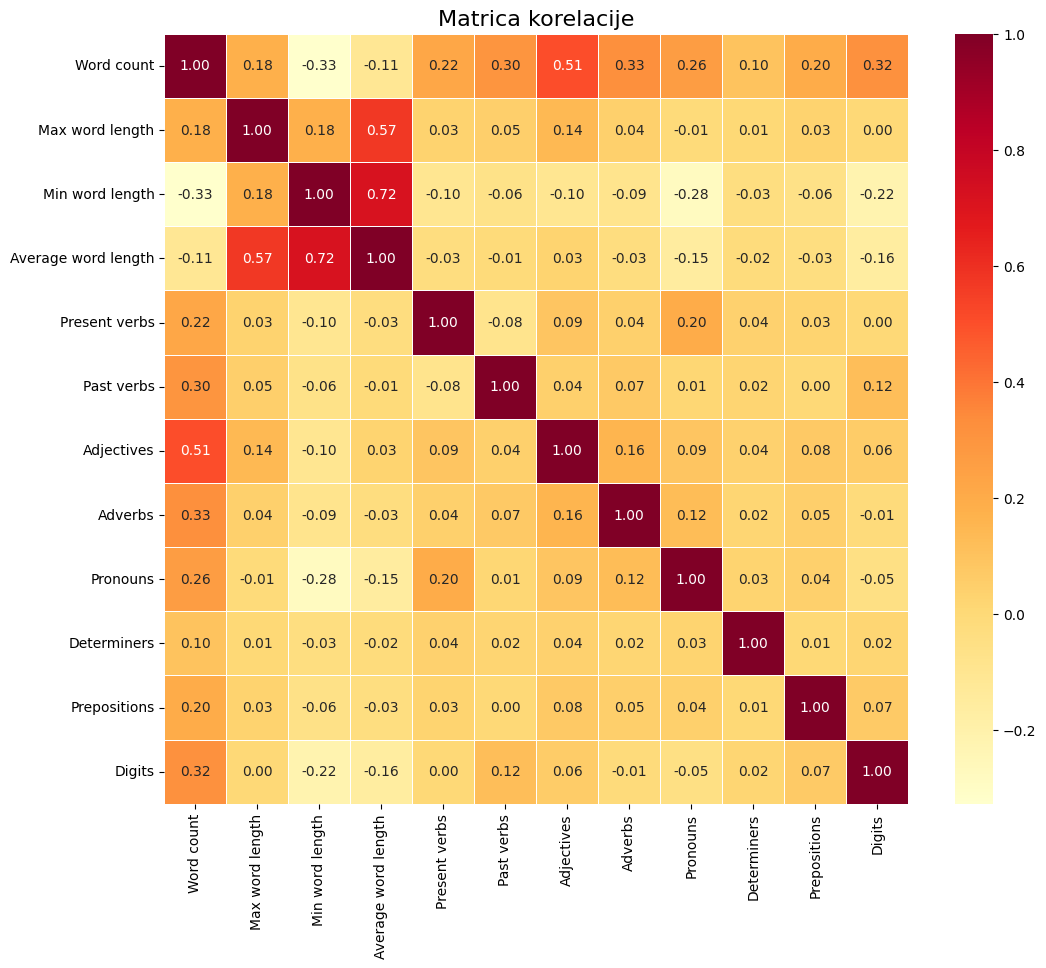

In [18]:
correlation_matrix = df[feature_cols_tweet].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [19]:
x = df[feature_cols_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [20]:

model = RandomForestClassifier()
model.fit(x_train, y_train)
importances = model.feature_importances_


In [21]:

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                Feature  Importance
3   Average word length    0.285542
0            Word count    0.171371
1       Max word length    0.115871
6            Adjectives    0.090894
7               Adverbs    0.069780
2       Min word length    0.053629
5            Past verbs    0.051439
4         Present verbs    0.048193
11               Digits    0.043083
8              Pronouns    0.034256
10         Prepositions    0.021874
9           Determiners    0.014068


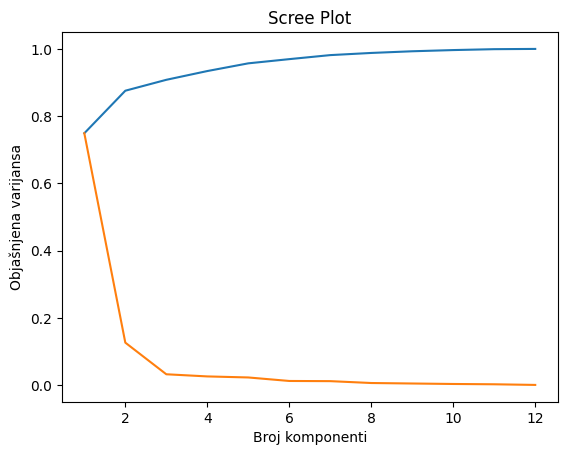

Broj komponenti za 95% varijanse: 5


In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


pca = PCA()
pca.fit(x_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()


plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Broj komponenti')
plt.ylabel('Kumulativni procenat varijanse')
plt.title('PCA - Kumulativna varijansa')
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Broj komponenti')
plt.ylabel('Objašnjena varijansa')
plt.title('Scree Plot')
plt.show()

plt.show()

# Pronađi broj komponenti koje objašnjavaju 95% varijanse
n_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Broj komponenti za 95% varijanse: {n_components_95}")


In [23]:
# Random Forest - Tweet


rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Accuracy: 0.6444725958493237
Precision: 0.661033425558962
Recall: 0.6383132356126796
Macro F1: 0.644
Weighted F1 ): 0.645
------------------------------
Klasa 0: 0.639
Klasa 1: 0.649
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.65      0.64     12990
         1.0       0.66      0.64      0.65     13849

    accuracy                           0.64     26839
   macro avg       0.64      0.64      0.64     26839
weighted avg       0.65      0.64      0.64     26839

------------------------------
Confusion matrix:
[[8457 4533]
 [5009 8840]]


In [24]:
# Decision Tree - Tweet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Accuracy: 0.6059838295018444
Precision: 0.6299412605175425
Recall: 0.5730377644595278
Macro F1: 0.606
Weighted F1 ): 0.606
------------------------------
Klasa 0: 0.612
Klasa 1: 0.6
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61     12990
         1.0       0.63      0.57      0.60     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8328 4662]
 [5913 7936]]


In [25]:
# Naive Bayes -  Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy: 0.5763627556913447
Precision: 0.5918760655251649
Recall: 0.5765759260596433
Macro F1: 0.576
Weighted F1 ): 0.576
------------------------------
Klasa 0: 0.568
Klasa 1: 0.584
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[7484 5506]
 [5864 7985]]


In [26]:
# Logistic Regression - Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5784492715823988
Precision: 0.5840572982293255
Recall: 0.6359303920860712
Macro F1: 0.576
Weighted F1 ): 0.577
------------------------------
Klasa 0: 0.543
Klasa 1: 0.609
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54     12990
         1.0       0.58      0.64      0.61     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[6718 6272]
 [5042 8807]]


In [27]:
#KNeighbors - Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

macro_f1 = metrics.f1_score(y_test, y_pred_knn, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred_knn, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred_knn, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))


Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}
Accuracy: 0.6101941204962927
Precision: 0.62625810780586
Recall: 0.606541988591234
Macro F1: 0.61
Weighted F1 ): 0.61
------------------------------
Klasa 0: 0.604
Klasa 1: 0.616
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60     12990
         1.0       0.63      0.61      0.62     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[7977 5013]
 [5449 8400]]


In [28]:
#XGBoost - Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision:", metrics.precision_score(y_test, y_pred_xgb))
print("Recall:", metrics.recall_score(y_test, y_pred_xgb))

macro_f1 = metrics.f1_score(y_test, y_pred_xgb, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred_xgb, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred_xgb, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_xgb))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_xgb))


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6311337978315138
Precision: 0.6493683334594145
Recall: 0.6198281464365658
Macro F1: 0.631
Weighted F1 ): 0.631
------------------------------
Klasa 0: 0.628
Klasa 1: 0.634
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     12990
         1.0       0.65      0.62      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8355 4635]
 [5265 8584]]


In [29]:
# SVM - Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.5927195499087149
Precision: 0.6051455750936869
Recall: 0.6063253664524514
Macro F1: 0.592
Weighted F1 ): 0.593
------------------------------
Klasa 0: 0.579
Klasa 1: 0.606
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58     12990
         1.0       0.61      0.61      0.61     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[7511 5479]
 [5452 8397]]


In [30]:
random_predictions = np.random.randint(0, 2, size=len(y_test)) 


print("=== Random Baseline Model ===")
print("Accuracy:", metrics.accuracy_score(y_test, random_predictions))
print("Precision:", metrics.precision_score(y_test, random_predictions, zero_division=1))
print("Recall:", metrics.recall_score(y_test, random_predictions, zero_division=1))
print("f1:", metrics.f1_score(y_test, random_predictions, zero_division=1))
print(classification_report(y_test, random_predictions))

=== Random Baseline Model ===
Accuracy: 0.503260181079772
Precision: 0.5190958114796483
Recall: 0.5074012564084049
f1: 0.5131819177682028
              precision    recall  f1-score   support

         0.0       0.49      0.50      0.49     12990
         1.0       0.52      0.51      0.51     13849

    accuracy                           0.50     26839
   macro avg       0.50      0.50      0.50     26839
weighted avg       0.50      0.50      0.50     26839



# Empath

In [6]:
df_empath = pd.read_csv("final_merged.csv")

In [48]:
df.shape

(134195, 37)

In [73]:
df_empath.shape

(134195, 233)

In [55]:
'''# Definicija emocija
positive_emotions = [
    'empath_result.joy', 'empath_result.cheerfulness', 'empath_result.fun', 'empath_result.optimism', 
    'empath_result.love', 'empath_result.affection', 'empath_result.celebration', 'empath_result.positive_emotion'
]

negative_emotions = [
    'empath_result.disgust', 'empath_result.sadness', 'empath_result.hate',
    'empath_result.neglect', 'empath_result.negative_emotion', 
]

fear_emotions = [
    'empath_result.suffering', 'empath_result.fear', 'empath_result.nervousness', 'empath_result.shame', 'empath_result.pain'
]

aggresion_emotion = [
    'empath_result.swearing_terms', 'empath_result.aggression', 'empath_result.crime','empath_result.violence'
]

moral_emotions = [
    'empath_result.politeness', 'empath_result.confusion', 'empath_result.envy',
    'empath_result.trust', 'empath_result.power','empath_result.pride', 'empath_result.sympathy', 'empath_result.deception'
]




df_empath['positive_emotions'] = df_empath[positive_emotions].sum(axis=1)
df_empath['negative_emotions'] = df_empath[negative_emotions].sum(axis=1)
df_empath['fear_emotions'] = df_empath[fear_emotions].sum(axis=1)
df_empath['aggression_emotions'] = df_empath[aggresion_emotion].sum(axis=1)
df_empath['moral_emotions'] = df_empath[moral_emotions].sum(axis=1)

print(df_empath[['positive_emotions', 'negative_emotions', 'fear_emotions', 'aggression_emotions', 'moral_emotions']].head(10))
'''

"# Definicija emocija\npositive_emotions = [\n    'empath_result.joy', 'empath_result.cheerfulness', 'empath_result.fun', 'empath_result.optimism', \n    'empath_result.love', 'empath_result.affection', 'empath_result.celebration', 'empath_result.positive_emotion'\n]\n\nnegative_emotions = [\n    'empath_result.disgust', 'empath_result.sadness', 'empath_result.hate',\n    'empath_result.neglect', 'empath_result.negative_emotion', \n]\n\nfear_emotions = [\n    'empath_result.suffering', 'empath_result.fear', 'empath_result.nervousness', 'empath_result.shame', 'empath_result.pain'\n]\n\naggresion_emotion = [\n    'empath_result.swearing_terms', 'empath_result.aggression', 'empath_result.crime','empath_result.violence'\n]\n\nmoral_emotions = [\n    'empath_result.politeness', 'empath_result.confusion', 'empath_result.envy',\n    'empath_result.trust', 'empath_result.power','empath_result.pride', 'empath_result.sympathy', 'empath_result.deception'\n]\n\n\n\n\ndf_empath['positive_emotions']

In [7]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_empath['emotion_positive'] = df_empath[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_empath['emotion_negative'] = df_empath[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_empath['emotion_social']   = df_empath[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_empath['emotion_intense']  = df_empath[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_empath['emotion_cognitive'] = df_empath[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [51]:
df_empath.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'majority_target',
       'statement', 'BinaryNumTarget', 'tweet', 'followers_count',
       'friends_count', 'favourites_count',
       ...
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical', 'emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive'],
      dtype='object', length=238)

In [8]:
kolone = ['emotion_positive', 'emotion_negative',
       'emotion_social', 'emotion_intense', 'emotion_cognitive']

In [123]:
x = df_empath[kolone]
y = df_empath['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 

In [56]:
# Random Forest - Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.5657066209620328
Precision: 0.5707830353108256
Recall: 0.638457650371868
Macro F1: 0.562
Weighted F1 ): 0.563
------------------------------
Klasa 0: 0.521
Klasa 1: 0.603
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.49      0.52     12990
         1.0       0.57      0.64      0.60     13849

    accuracy                           0.57     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.56      0.57      0.56     26839

------------------------------
Confusion matrix:
[[6341 6649]
 [5007 8842]]


In [57]:
best_model = grid_search.best_estimator_
importances = best_model.feature_importances_

for importance, name in sorted(zip(importances, x_train.columns), reverse=True):
    print(f"{name}: {importance:.4f}")


emotion_negative: 0.2638
emotion_social: 0.2605
emotion_positive: 0.1777
emotion_intense: 0.1533
emotion_cognitive: 0.1447


In [58]:
# Decision Tree - Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.5628749208241738
Precision: 0.5626962032814073
Recall: 0.685970106144848
Macro F1: 0.553
Weighted F1 ): 0.556
------------------------------
Klasa 0: 0.489
Klasa 1: 0.618
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.43      0.49     12990
         1.0       0.56      0.69      0.62     13849

    accuracy                           0.56     26839
   macro avg       0.56      0.56      0.55     26839
weighted avg       0.56      0.56      0.56     26839

------------------------------
Confusion matrix:
[[5607 7383]
 [4349 9500]]


In [59]:
import pandas as pd

print(pd.DataFrame(x_train).isna().sum())  # Koliko NaN ima po koloni


emotion_positive     0
emotion_negative     0
emotion_social       0
emotion_intense      0
emotion_cognitive    0
dtype: int64


In [126]:
# Naive Bayes -  Empath

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5423450948246954
Precision: 0.5393823558998089
Recall: 0.7743519387681421
Macro F1: 0.51
Weighted F1 ): 0.514
------------------------------
Klasa 0: 0.384
Klasa 1: 0.636
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.29      0.38     12990
         1.0       0.54      0.77      0.64     13849

    accuracy                           0.54     26839
   macro avg       0.55      0.53      0.51     26839
weighted avg       0.54      0.54      0.51     26839

------------------------------
Confusion matrix:
[[ 3832  9158]
 [ 3125 10724]]


In [60]:
# Naive Bayes -  Empath

nb = GaussianNB()

nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5423450948246954
Precision: 0.5393823558998089
Recall: 0.7743519387681421
Macro F1: 0.51
Weighted F1 ): 0.514
------------------------------
Klasa 0: 0.384
Klasa 1: 0.636
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.29      0.38     12990
         1.0       0.54      0.77      0.64     13849

    accuracy                           0.54     26839
   macro avg       0.55      0.53      0.51     26839
weighted avg       0.54      0.54      0.51     26839

------------------------------
Confusion matrix:
[[ 3832  9158]
 [ 3125 10724]]


In [61]:
# Logistic Regression - Empath

param_grid = {'C': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=3, scoring='accuracy')
grid_search.fit(x_train, y_train)

print("Best hyperparameters from GridSearchCV:", grid_search.best_params_)

lr = LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear', C=grid_search.best_params_['C'])

lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best hyperparameters from GridSearchCV: {'C': 1}
Accuracy: 0.5498714557174261
Precision: 0.5552430946131733
Recall: 0.6415625676944183
Macro F1: 0.544
Weighted F1 ): 0.546
------------------------------
Klasa 0: 0.493
Klasa 1: 0.595
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.45      0.49     12990
         1.0       0.56      0.64      0.60     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.55      0.54     26839
weighted avg       0.55      0.55      0.55     26839

------------------------------
Confusion matrix:
[[5873 7117]
 [4964 8885]]


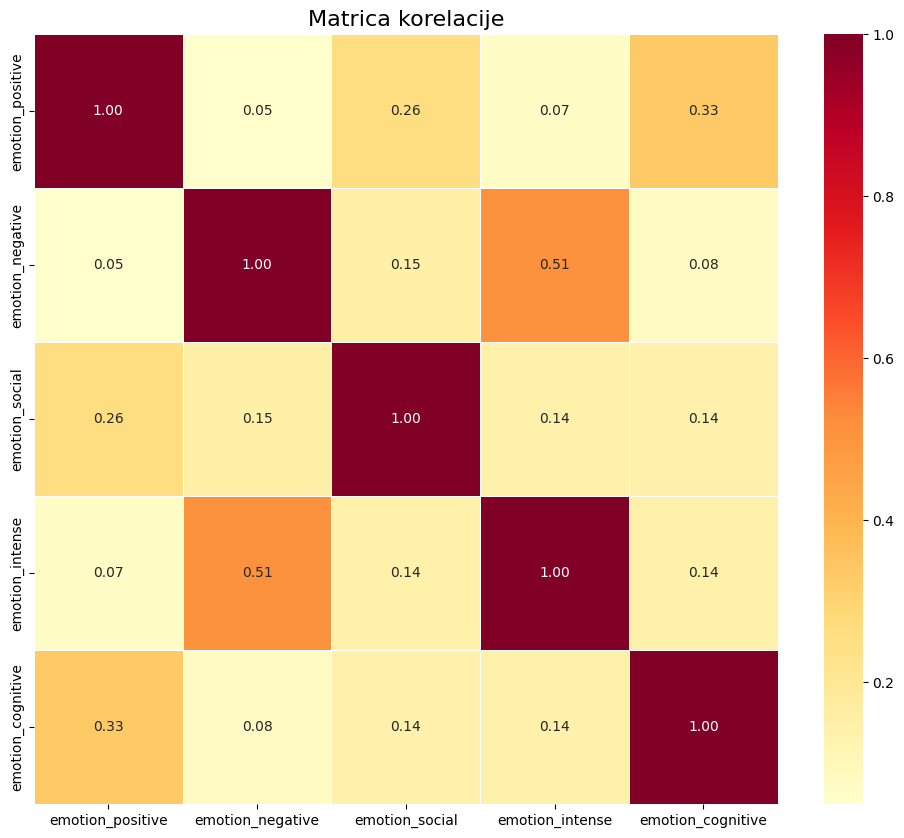

In [127]:
correlation_matrix = df_empath[kolone].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', fmt=".2f", linewidths=.5)
plt.title('Matrica korelacije', fontsize=16)
plt.show()

In [62]:
#KNeighbors - Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:", metrics.precision_score(y_test, y_pred_knn))
print("Recall:", metrics.recall_score(y_test, y_pred_knn))

macro_f1 = metrics.f1_score(y_test, y_pred_knn, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred_knn, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred_knn, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred_knn))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_knn))



Best parameters for KNN: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.5493870859570029
Precision: 0.5510500901739485
Recall: 0.6839482995162106
Macro F1: 0.538
Weighted F1 ): 0.54
------------------------------
Klasa 0: 0.466
Klasa 1: 0.61
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.41      0.47     12990
         1.0       0.55      0.68      0.61     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.54      0.54     26839
weighted avg       0.55      0.55      0.54     26839

------------------------------
Confusion matrix:
[[5273 7717]
 [4377 9472]]


In [63]:
#XGBoost - Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Accuracy: 0.5654085472633108
Precision: 0.567102757815859
Recall: 0.666690735793198
Macro F1: 0.559
Weighted F1 ): 0.561
------------------------------
Klasa 0: 0.505
Klasa 1: 0.613
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.46      0.50     12990
         1.0       0.57      0.67      0.61     13849

    accuracy                           0.57     26839
   macro avg       0.56      0.56      0.56     26839
weighted avg       0.57      0.57      0.56     26839

------------------------------
Confusion matrix:
[[5942 7048]
 [4616 9233]]


In [64]:
# SVM - Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.5542307835612356
Precision: 0.5676840215439857
Recall: 0.5707993356921077
Macro F1: 0.554
Weighted F1 ): 0.554
------------------------------
Klasa 0: 0.538
Klasa 1: 0.569
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.54      0.54     12990
         1.0       0.57      0.57      0.57     13849

    accuracy                           0.55     26839
   macro avg       0.55      0.55      0.55     26839
weighted avg       0.55      0.55      0.55     26839

------------------------------
Confusion matrix:
[[6970 6020]
 [5944 7905]]


# User + Tweet

In [76]:
features_cols_user_tweet = feature_cols_tweet+feature_cols_users

In [77]:
x = df[features_cols_user_tweet]
y = df['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [78]:
# Random Forest - User and Tweet
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy: 0.6746525578449272
Precision: 0.6900111399925734
Recall: 0.6708787638096614
Macro F1: 0.675
Weighted F1 ): 0.675
------------------------------
Klasa 0: 0.669
Klasa 1: 0.68
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.68      0.67     12990
         1.0       0.69      0.67      0.68     13849

    accuracy                           0.67     26839
   macro avg       0.67      0.67      0.67     26839
weighted avg       0.68      0.67      0.67     26839

------------------------------
Confusion matrix:
[[8816 4174]
 [4558 9291]]


In [79]:
# Decision Tree - User and Tweet

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6201050709787995
Precision: 0.6566332218506131
Recall: 0.5528919055527475
Macro F1: 0.619
Weighted F1 ): 0.619
------------------------------
Klasa 0: 0.638
Klasa 1: 0.6
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.69      0.64     12990
         1.0       0.66      0.55      0.60     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.63      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8986 4004]
 [6192 7657]]


In [81]:
# Naive Bayes -  User and Tweet

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': False}
Accuracy: 0.5766980886024069
Precision: 0.601783668793978
Recall: 0.5310852769153007
Macro F1: 0.576
Weighted F1 ): 0.576
------------------------------
Klasa 0: 0.588
Klasa 1: 0.564
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.63      0.59     12990
         1.0       0.60      0.53      0.56     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[8123 4867]
 [6494 7355]]


In [82]:
# Logistic Regression - User and Tweet

lr = LogisticRegression(max_iter=1000)  
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)


print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.6021088714184583
Precision: 0.6187799760191847
Recall: 0.5962163333092642
Macro F1: 0.602
Weighted F1 ): 0.602
------------------------------
Klasa 0: 0.597
Klasa 1: 0.607
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60     12990
         1.0       0.62      0.60      0.61     13849

    accuracy                           0.60     26839
   macro avg       0.60      0.60      0.60     26839
weighted avg       0.60      0.60      0.60     26839

------------------------------
Confusion matrix:
[[7903 5087]
 [5592 8257]]


In [83]:
#KNeighbors - User and Tweet


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
   # 'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='f1', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7}
Accuracy: 0.6212601065613473
Precision: 0.6409550045913682
Recall: 0.6048090114809733
Macro F1: 0.621
Weighted F1 ): 0.621
------------------------------
Klasa 0: 0.62
Klasa 1: 0.622
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.64      0.62     12990
         1.0       0.64      0.60      0.62     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8298 4692]
 [5473 8376]]


In [84]:
#XGBoost - User and Tweet

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    #'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='f1', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred= best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6636610902045531
Precision: 0.6835134723702238
Recall: 0.6484222687558668
Macro F1: 0.664
Weighted F1 ): 0.664
------------------------------
Klasa 0: 0.662
Klasa 1: 0.666
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.68      0.66     12990
         1.0       0.68      0.65      0.67     13849

    accuracy                           0.66     26839
   macro avg       0.66      0.66      0.66     26839
weighted avg       0.66      0.66      0.66     26839

------------------------------
Confusion matrix:
[[8832 4158]
 [4869 8980]]


In [85]:
# SVM - User and Tweet

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.6181675919371065
Precision: 0.6519024719480301
Recall: 0.5579464221243411
Macro F1: 0.617
Weighted F1 ): 0.617
------------------------------
Klasa 0: 0.634
Klasa 1: 0.601
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63     12990
         1.0       0.65      0.56      0.60     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8864 4126]
 [6122 7727]]


# User + Empath

In [9]:
df_merged = pd.read_csv("final_merged.csv")

In [10]:
# Grupa 1: Pozitivne emocije
positive_emotions = [
    'cheerfulness', 'joy', 'contentment', 'love', 'warmth',
    'positive_emotion', 'fun', 'giving', 'friends'
]

# Grupa 2: Negativne emocije
negative_emotions = [
    'sadness', 'disgust', 'suffering', 'negative_emotion',
    'weakness', 'neglect'
]

# Grupa 3: Socijalne emocije
social_emotions = [
    'pride', 'shame', 'politeness', 'affection', 'leader',
    'dominant_personality', 'childish', 'trust', 'sympathy'
]

# Grupa 4: Intenzivne emocije
intense_emotions = [
    'surprise', 'rage', 'horror', 'fear', 'exasperation',
    'nervousness', 'irritability', 'torment', 'pain', 'hate', 'anger'
]

# Grupa 5: Kognitivno-emotivne emocije
cognitive_emotions = [
    'anticipation', 'confusion', 'envy', 'disappointment',
    'optimism', 'zest', 'achievement'
]

# Kreiranje novih kolona kao zbir postojećih
df_merged['emotion_positive'] = df_merged[[f'empath_result.{x}' for x in positive_emotions]].sum(axis=1)
df_merged['emotion_negative'] = df_merged[[f'empath_result.{x}' for x in negative_emotions]].sum(axis=1)
df_merged['emotion_social']   = df_merged[[f'empath_result.{x}' for x in social_emotions]].sum(axis=1)
df_merged['emotion_intense']  = df_merged[[f'empath_result.{x}' for x in intense_emotions]].sum(axis=1)
df_merged['emotion_cognitive'] = df_merged[[f'empath_result.{x}' for x in cognitive_emotions]].sum(axis=1)


In [88]:
features_cols_user_empath = feature_cols_users + kolone


In [89]:
features_cols_user_empath

['followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [90]:
x = df_merged[features_cols_user_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [91]:
# Random Forest - User and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.6429077089310332
Precision: 0.6562385522748919
Recall: 0.6467614990252004
Macro F1: 0.643
Weighted F1 ): 0.643
------------------------------
Klasa 0: 0.634
Klasa 1: 0.651
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.63     12990
         1.0       0.66      0.65      0.65     13849

    accuracy                           0.64     26839
   macro avg       0.64      0.64      0.64     26839
weighted avg       0.64      0.64      0.64     26839

------------------------------
Confusion matrix:
[[8298 4692]
 [4892 8957]]


In [92]:
#Decision Tree - User and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.5856775587764075
Precision: 0.6158024272256641
Recall: 0.5239367463354755
Macro F1: 0.585
Weighted F1 ): 0.584
------------------------------
Klasa 0: 0.604
Klasa 1: 0.566
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.65      0.60     12990
         1.0       0.62      0.52      0.57     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.58     26839
weighted avg       0.59      0.59      0.58     26839

------------------------------
Confusion matrix:
[[8463 4527]
 [6593 7256]]


In [93]:
# Naive Bayes -  User and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': False}
Accuracy: 0.5680912105518089
Precision: 0.6092978208232446
Recall: 0.45425662502707775
Macro F1: 0.564
Weighted F1 ): 0.562
------------------------------
Klasa 0: 0.607
Klasa 1: 0.52
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.54      0.69      0.61     12990
         1.0       0.61      0.45      0.52     13849

    accuracy                           0.57     26839
   macro avg       0.58      0.57      0.56     26839
weighted avg       0.58      0.57      0.56     26839

------------------------------
Confusion matrix:
[[8956 4034]
 [7558 6291]]


In [94]:
# Logistic Regression - User and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 10, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.5726740936696598
Precision: 0.6029768085842853
Recall: 0.5031410210123475
Macro F1: 0.571
Weighted F1 ): 0.571
------------------------------
Klasa 0: 0.594
Klasa 1: 0.549
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.65      0.59     12990
         1.0       0.60      0.50      0.55     13849

    accuracy                           0.57     26839
   macro avg       0.58      0.57      0.57     26839
weighted avg       0.58      0.57      0.57     26839

------------------------------
Confusion matrix:
[[8402 4588]
 [6881 6968]]


In [95]:
#KNeighbors - User and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6417526733484854
Precision: 0.6507619997151403
Recall: 0.6598310347317495
Macro F1: 0.641
Weighted F1 ): 0.642
------------------------------
Klasa 0: 0.627
Klasa 1: 0.655
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.63      0.62      0.63     12990
         1.0       0.65      0.66      0.66     13849

    accuracy                           0.64     26839
   macro avg       0.64      0.64      0.64     26839
weighted avg       0.64      0.64      0.64     26839

------------------------------
Confusion matrix:
[[8086 4904]
 [4711 9138]]


In [96]:
#XGBoost - User and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6267372107753643
Precision: 0.642660311313026
Recall: 0.6230774785183045
Macro F1: 0.627
Weighted F1 ): 0.627
------------------------------
Klasa 0: 0.621
Klasa 1: 0.633
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.63      0.62     12990
         1.0       0.64      0.62      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8192 4798]
 [5220 8629]]


In [97]:
# SVM - User and Empath

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale'] 
}

svm = SVC()
grid = GridSearchCV(svm, param_grid, cv=2, n_jobs=-1, verbose=1, scoring='f1') 
grid.fit(x_train, y_train)

best_svm = grid.best_estimator_
y_pred = best_svm.predict(x_test)

print("Najbolji parametri:", grid.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 2 folds for each of 6 candidates, totalling 12 fits
Najbolji parametri: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.5785610492194195
Precision: 0.6197395735044348
Recall: 0.47425806917466967
Macro F1: 0.575
Weighted F1 ): 0.574
------------------------------
Klasa 0: 0.613
Klasa 1: 0.537
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.55      0.69      0.61     12990
         1.0       0.62      0.47      0.54     13849

    accuracy                           0.58     26839
   macro avg       0.59      0.58      0.58     26839
weighted avg       0.59      0.58      0.57     26839

------------------------------
Confusion matrix:
[[8960 4030]
 [7281 6568]]


# Tweet + Empath

In [98]:
features_cols_tweet_empath = feature_cols_tweet + kolone

In [99]:
features_cols_tweet_empath

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Determiners',
 'Prepositions',
 'Digits',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [100]:
x = df_merged[features_cols_tweet_empath]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [101]:
# Random Forest - Tweet and Empath
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6580349491411751
Precision: 0.6772137491463692
Recall: 0.6444508628781862
Macro F1: 0.658
Weighted F1 ): 0.658
------------------------------
Klasa 0: 0.656
Klasa 1: 0.66
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66     12990
         1.0       0.68      0.64      0.66     13849

    accuracy                           0.66     26839
   macro avg       0.66      0.66      0.66     26839
weighted avg       0.66      0.66      0.66     26839

------------------------------
Confusion matrix:
[[8736 4254]
 [4924 8925]]


In [102]:
#Decision Tree - Tweet and Empath

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search.fit(x_train, y_train)
best_clf = grid_search.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Accuracy: 0.6141063377920191
Precision: 0.6342663795755152
Recall: 0.5955664668929165
Macro F1: 0.614
Weighted F1 ): 0.614
------------------------------
Klasa 0: 0.614
Klasa 1: 0.614
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.60      0.63      0.61     12990
         1.0       0.63      0.60      0.61     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.62      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8234 4756]
 [5601 8248]]


In [103]:
# Naive Bayes -  Tweet and Empath

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)

best_nb = grid_search.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 0.01, 'fit_prior': True}
Accuracy: 0.5768098662394276
Precision: 0.5923755840688274
Recall: 0.5767203408188317
Macro F1: 0.577
Weighted F1 ): 0.577
------------------------------
Klasa 0: 0.569
Klasa 1: 0.584
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57     12990
         1.0       0.59      0.58      0.58     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[7494 5496]
 [5862 7987]]


In [104]:
# Logistic Regression -Tweet and Empath

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(x_train, y_train)


best_lr = grid_search.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 1, 'class_weight': None, 'penalty': 'l2'}
Accuracy: 0.5859383732627892
Precision: 0.5910664358940221
Recall: 0.6411293234168532
Macro F1: 0.584
Weighted F1 ): 0.585
------------------------------
Klasa 0: 0.552
Klasa 1: 0.615
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.53      0.55     12990
         1.0       0.59      0.64      0.62     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.58      0.58     26839
weighted avg       0.59      0.59      0.58     26839

------------------------------
Confusion matrix:
[[6847 6143]
 [4970 8879]]


In [105]:
#KNeighbors - Tweet and Empath


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6080330861805582
Precision: 0.6229592967422619
Recall: 0.6089248321178424
Macro F1: 0.608
Weighted F1 ): 0.608
------------------------------
Klasa 0: 0.6
Klasa 1: 0.616
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.61      0.60     12990
         1.0       0.62      0.61      0.62     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.61     26839

------------------------------
Confusion matrix:
[[7886 5104]
 [5416 8433]]


In [106]:
#XGBoost - Tweet and Empath

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred= best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.9}
Accuracy: 0.6663437534930512
Precision: 0.6790313140181445
Recall: 0.6701566900137194
Macro F1: 0.666
Weighted F1 ): 0.666
------------------------------
Klasa 0: 0.658
Klasa 1: 0.675
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.65      0.66      0.66     12990
         1.0       0.68      0.67      0.67     13849

    accuracy                           0.67     26839
   macro avg       0.67      0.67      0.67     26839
weighted avg       0.67      0.67      0.67     26839

------------------------------
Confusion matrix:
[[8603 4387]
 [4568 9281]]


In [107]:
# SVM - Tweet and Empath

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy: 0.5938745854912627
Precision: 0.6059495580944169
Recall: 0.6089248321178424
Macro F1: 0.593
Weighted F1 ): 0.594
------------------------------
Klasa 0: 0.579
Klasa 1: 0.607
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.58      0.58     12990
         1.0       0.61      0.61      0.61     13849

    accuracy                           0.59     26839
   macro avg       0.59      0.59      0.59     26839
weighted avg       0.59      0.59      0.59     26839

------------------------------
Confusion matrix:
[[7506 5484]
 [5416 8433]]


# User + Tweet + Empath 

In [11]:
features_full = feature_cols_tweet+feature_cols_users+kolone

In [12]:
features_full

['Word count',
 'Max word length',
 'Min word length',
 'Average word length',
 'Present verbs',
 'Past verbs',
 'Adjectives',
 'Adverbs',
 'Pronouns',
 'Determiners',
 'Prepositions',
 'Digits',
 'followers_count',
 'favourites_count',
 'friends_count',
 'statuses_count',
 'listed_count',
 'cred',
 'BotScore',
 'normalize_influence',
 'emotion_positive',
 'emotion_negative',
 'emotion_social',
 'emotion_intense',
 'emotion_cognitive']

In [110]:
df_merged['followers_count'].max()

18.687664430135666

In [ ]:
df_merged['followers_count'].max()

18.687664430135662

In [13]:
x = df_merged[features_full]
y = df_merged['BinaryNumTarget']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) 


In [14]:
# Random Forest - Full
rf = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100],                
    'max_depth': [10, None],               
    'min_samples_split': [2],              
    'min_samples_leaf': [1],              
    'criterion': ['gini']                 
}


grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_rf.fit(x_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(x_test)

print("Najbolji parametri:", grid_search_rf.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Najbolji parametri: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.6738701143857819
Precision: 0.6926799758015729
Recall: 0.6614195970828218
Macro F1: 0.674
Weighted F1 ): 0.674
------------------------------
Klasa 0: 0.671
Klasa 1: 0.677
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.66      0.69      0.67     12990
         1.0       0.69      0.66      0.68     13849

    accuracy                           0.67     26839
   macro avg       0.67      0.67      0.67     26839
weighted avg       0.67      0.67      0.67     26839

------------------------------
Confusion matrix:
[[8926 4064]
 [4689 9160]]


In [19]:
#Decision Tree - Full

clf = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_clf = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)


grid_search_clf.fit(x_train, y_train)
best_clf = grid_search_clf.best_estimator_
y_pred = best_clf.predict(x_test)


print("Najbolji parametri:", grid_search_clf.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 90 candidates, totalling 450 fits
Najbolji parametri: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.6144044114907411
Precision: 0.6454454787234043
Recall: 0.5607625099285147
Macro F1: 0.614
Weighted F1 ): 0.613
------------------------------
Klasa 0: 0.628
Klasa 1: 0.6
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     12990
         1.0       0.65      0.56      0.60     13849

    accuracy                           0.61     26839
   macro avg       0.62      0.62      0.61     26839
weighted avg       0.62      0.61      0.61     26839

------------------------------
Confusion matrix:
[[8724 4266]
 [6083 7766]]


In [21]:
# Naive Bayes -  Full

nb = MultinomialNB()


param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0],        
    'fit_prior': [True, False],                      
}

grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_nb.fit(x_train, y_train)

best_nb = grid_search_nb.best_estimator_
y_pred = best_nb.predict(x_test)

print("Najbolji parametri:", grid_search_nb.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji parametri: {'alpha': 2.0, 'fit_prior': True}
Accuracy: 0.5766608293900667
Precision: 0.5978286523483597
Recall: 0.5487038775362842
Macro F1: 0.577
Weighted F1 ): 0.576
------------------------------
Klasa 0: 0.581
Klasa 1: 0.572
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.56      0.61      0.58     12990
         1.0       0.60      0.55      0.57     13849

    accuracy                           0.58     26839
   macro avg       0.58      0.58      0.58     26839
weighted avg       0.58      0.58      0.58     26839

------------------------------
Confusion matrix:
[[7878 5112]
 [6250 7599]]


In [23]:
# Logistic Regression - Full

lr = LogisticRegression(max_iter=1000)  


param_grid = {
    'C': [0.01, 0.1, 1, 10],          
    'penalty': ['l1', 'l2'],            
    'class_weight': [None, 'balanced']    
}

grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, 
                           cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search_lr.fit(x_train, y_train)


best_lr = grid_search_lr.best_estimator_
y_pred = best_lr.predict(x_test)


print("Najbolji parametri:", grid_search_lr.best_params_)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-package

Najbolji parametri: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy: 0.6052386452550393
Precision: 0.6292500794407372
Recall: 0.5719546537656148
Macro F1: 0.605
Weighted F1 ): 0.605
------------------------------
Klasa 0: 0.611
Klasa 1: 0.599
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.64      0.61     12990
         1.0       0.63      0.57      0.60     13849

    accuracy                           0.61     26839
   macro avg       0.61      0.61      0.61     26839
weighted avg       0.61      0.61      0.60     26839

------------------------------
Confusion matrix:
[[8323 4667]
 [5928 7921]]


In [28]:
#KNeighbors - Full


param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(x_train, y_train)

print("Best parameters for KNN:", grid_search_knn.best_params_)

best_knn = grid_search_knn.best_estimator_
y_pred = best_knn.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))



Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.6296434293379038
Precision: 0.6487782598766841
Recall: 0.61542349628132
Macro F1: 0.63
Weighted F1 ): 0.63
------------------------------
Klasa 0: 0.628
Klasa 1: 0.632
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.61      0.64      0.63     12990
         1.0       0.65      0.62      0.63     13849

    accuracy                           0.63     26839
   macro avg       0.63      0.63      0.63     26839
weighted avg       0.63      0.63      0.63     26839

------------------------------
Confusion matrix:
[[8376 4614]
 [5326 8523]]


In [15]:
#XGBoost - Full

param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],  
    'n_estimators': [100, 200],        
    'max_depth': [3, 5, 7],             
    'subsample': [0.8, 0.9, 1.0],        
    'colsample_bytree': [0.8, 0.9]       
}
grid_search_xgb = GridSearchCV(XGBClassifier(), param_grid_xgb, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(x_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

best_xgb = grid_search_xgb.best_estimator_
y_pred = best_xgb.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Best parameters for XGBoost: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Accuracy: 0.6857930623346622
Precision: 0.700325491936677
Recall: 0.6835872626182395
Macro F1: 0.686
Weighted F1 ): 0.686
------------------------------
Klasa 0: 0.679
Klasa 1: 0.692
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68     12990
         1.0       0.70      0.68      0.69     13849

    accuracy                           0.69     26839
   macro avg       0.69      0.69      0.69     26839
weighted avg       0.69      0.69      0.69     26839

------------------------------
Confusion matrix:
[[8939 4051]
 [4382 9467]]


In [120]:
# SVM - Full

svm_clf = SVC()  
svm_clf.fit(x_train, y_train)  

y_pred = svm_clf.predict(x_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

macro_f1 = metrics.f1_score(y_test, y_pred, average='macro')

weighted_f1 = metrics.f1_score(y_test, y_pred, average='weighted')

print("Macro F1:", round(macro_f1, 3))
print("Weighted F1 ):", round(weighted_f1, 3))
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

print("------------------------------")

print("Klasa 0:", round(df_report.loc['0.0', 'f1-score'], 3))
print("Klasa 1:", round(df_report.loc['1.0', 'f1-score'], 3))

print("------------------------------")
print("Classification report:")
print(classification_report(y_test, y_pred))

print("------------------------------")
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))


Accuracy: 0.617496926114982
Precision: 0.6511431705053573
Recall: 0.5572965557079933
Macro F1: 0.617
Weighted F1 ): 0.616
------------------------------
Klasa 0: 0.633
Klasa 1: 0.601
------------------------------
Classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63     12990
         1.0       0.65      0.56      0.60     13849

    accuracy                           0.62     26839
   macro avg       0.62      0.62      0.62     26839
weighted avg       0.62      0.62      0.62     26839

------------------------------
Confusion matrix:
[[8855 4135]
 [6131 7718]]


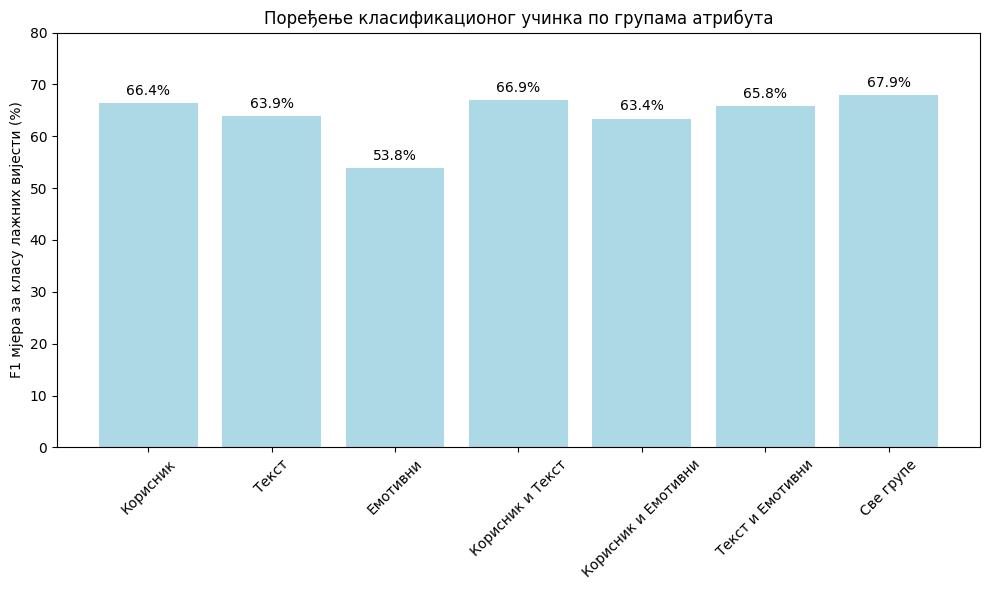

In [ ]:
import matplotlib.pyplot as plt

results = {
    "Корисник":     0.664,
    "Текст":        0.639,
    "Емотивни":     0.538,
    "Корисник и Текст":        0.669,
    "Корисник и Емотивни":     0.634,
    "Текст и Емотивни":        0.658,
    "Све групе":               0.679
}


values = [v * 100 for v in results.values()]
labels = list(results.keys())

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color='lightblue')
plt.ylabel("F1 мјера за класу лажних вијести (%)")
plt.title("Поређење класификационог учинка по групама атрибута")
plt.ylim(0, 80)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()


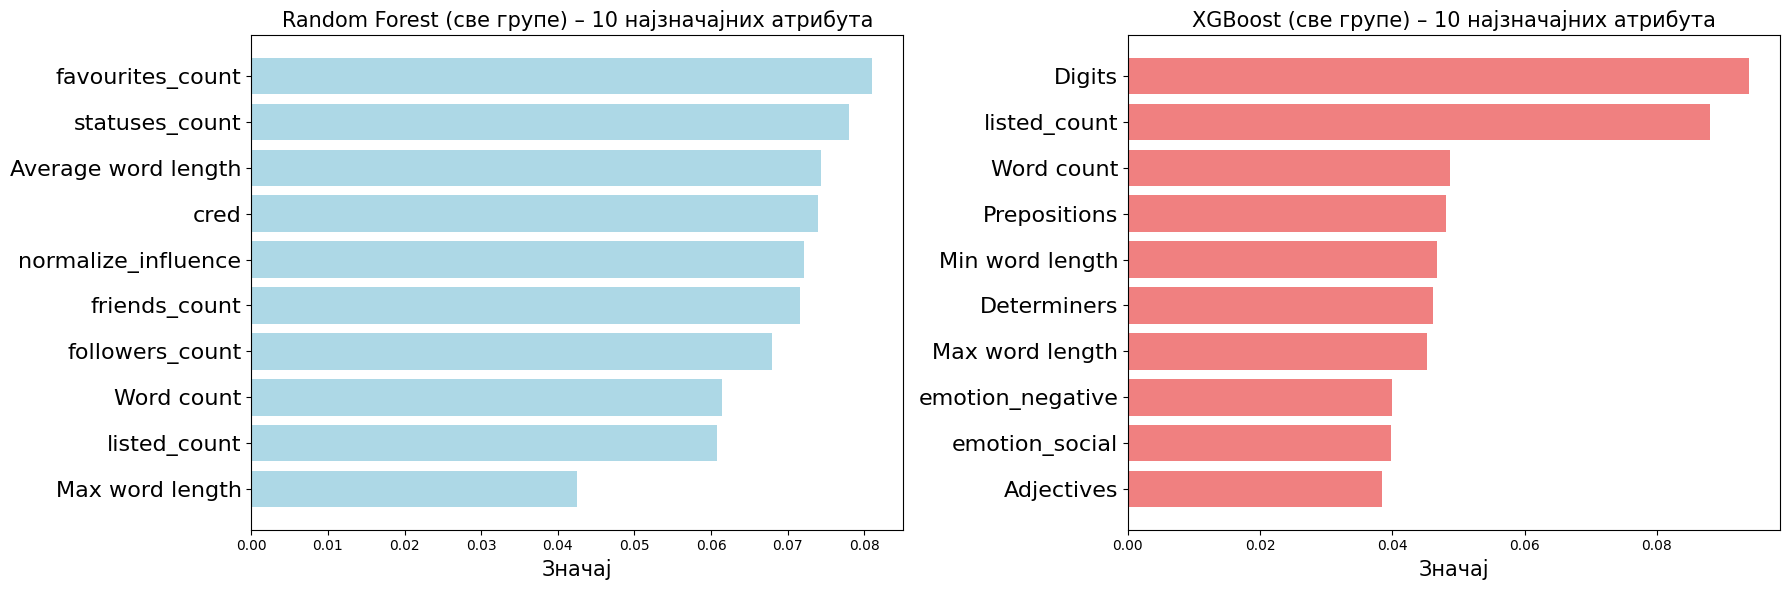

In [17]:
import matplotlib.pyplot as plt

best_model_rf = grid_search_rf.best_estimator_
importances_rf = best_model_rf.feature_importances_
feature_names_rf = x_train.columns

features_sorted_rf = sorted(zip(importances_rf, feature_names_rf), reverse=True)
top_10_rf = features_sorted_rf[:10]
importances_rf_sorted, names_rf_sorted = zip(*top_10_rf)
best_model_xgb = grid_search_xgb.best_estimator_
importances_xgb = best_model_xgb.feature_importances_
feature_names_xgb = x_train.columns

features_sorted_xgb = sorted(zip(importances_xgb, feature_names_xgb), reverse=True)
top_10_xgb = features_sorted_xgb[:10]
importances_xgb_sorted, names_xgb_sorted = zip(*top_10_xgb)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=False)

# Random Forest график
axes[0].barh(names_rf_sorted, importances_rf_sorted, color='lightblue')
axes[0].set_title("Random Forest (све групе) – 10 најзначајних атрибута", fontsize=15)
axes[0].set_xlabel("Значај", fontsize=15)
axes[0].invert_yaxis()
axes[0].tick_params(axis='y', labelsize=16)

# XGBoost график
axes[1].barh(names_xgb_sorted, importances_xgb_sorted, color='lightcoral')
axes[1].set_title("XGBoost (све групе) – 10 најзначајних атрибута", fontsize=15)
axes[1].set_xlabel("Значај", fontsize=15)
axes[1].invert_yaxis()
axes[1].tick_params(axis='y', labelsize=16)


plt.tight_layout()
plt.show()


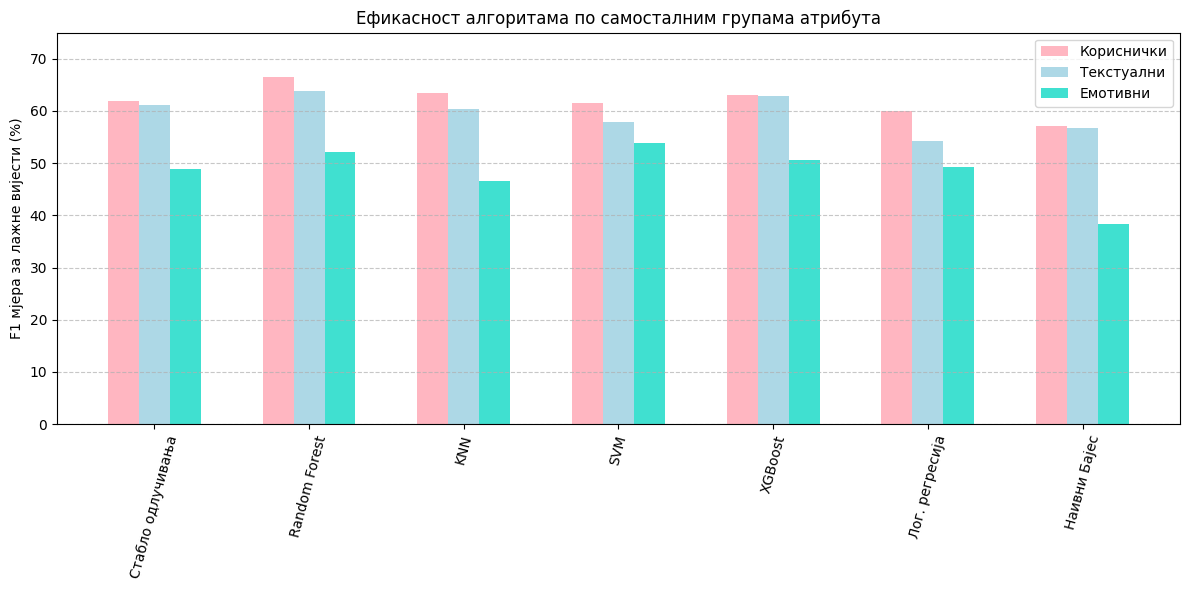

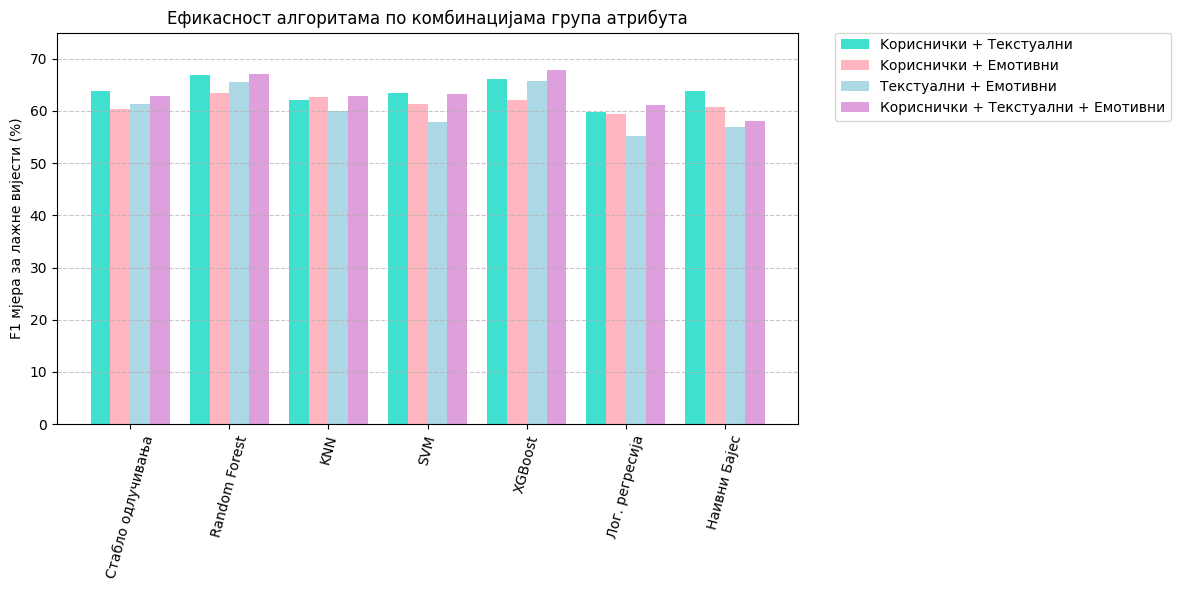

In [ ]:


algoritmi = ['Стабло одлучивања','Random Forest','KNN', 'SVM', 'XGBoost', 'Лог. регресија', 'Наивни Бајес']
x = np.arange(len(algoritmi))
width = 0.2
f1_user = np.array([0.619, 0.664, 0.635, 0.616, 0.630, 0.600, 0.572]) * 100
f1_text = np.array([0.612, 0.639, 0.604, 0.579, 0.628, 0.543, 0.568]) * 100
f1_empath = np.array([0.489, 0.521, 0.466, 0.538, 0.505, 0.493, 0.384]) * 100

f1_u_t = np.array([0.638, 0.669, 0.6200, 0.634, 0.662, 0.597, 0.638]) * 100
f1_u_e = np.array([0.604, 0.634, 0.627, 0.613, 0.621, 0.594, 0.607]) * 100
f1_t_e = np.array([0.614, 0.656, 0.600, 0.579, 0.658, 0.552, 0.569]) * 100
f1_u_t_e = np.array([0.628, 0.671, 0.628, 0.633, 0.679, 0.611, 0.581]) * 100


plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - width, f1_user, width, label='Кориснички', color='lightpink')
bars2 = plt.bar(x, f1_text, width, label='Текстуални', color='lightblue')
bars3 = plt.bar(x + width, f1_empath, width, label='Емотивни', color='turquoise')

plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 75)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама по самосталним групама атрибута')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


plt.figure(figsize=(12, 6))
bars1 = plt.bar(x - 1.5*width, f1_u_t, width, label='Kориснички + Текстуални', color='turquoise')
bars2 = plt.bar(x - 0.5*width, f1_u_e, width, label='Kориснички + Емотивни', color='lightpink')
bars3 = plt.bar(x + 0.5*width, f1_t_e, width, label='Текстуални + Емотивни', color='lightblue')
bars4 = plt.bar(x + 1.5*width, f1_u_t_e, width, label='Кориснички + Текстуални + Емотивни', color='plum')

plt.xticks(x, algoritmi, rotation=75)
plt.ylim(0, 75)
plt.ylabel('F1 мјера за лажне вијести (%)')
plt.title('Ефикасност алгоритама по комбинацијама група атрибута')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
